In [32]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 999
#difference are all in the decimal places

In [33]:
from prepare_data import create_testdata
trainval,test=create_testdata()

In [34]:
c=trainval['Country'].value_counts()

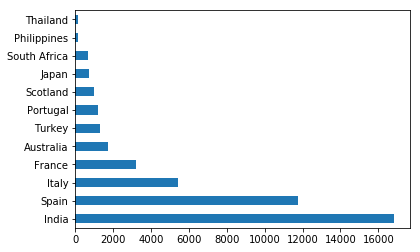

In [35]:
c.plot(kind='barh',rot=0)

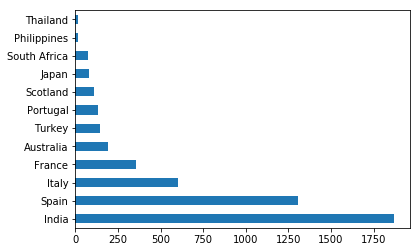

In [36]:
c_test=test['Country'].value_counts()
c_test.plot(kind='barh',rot=0)

## now build a naive detector that takes the mean of each country and predict for the test set

In [37]:
country_group=trainval.groupby(['Country']).mean()

In [38]:
country_group

,Longitude(x),Latitude(y),DTU_50m_WindSp(m/s),DTU_100m_WindSp(m/s),DTU_200m_WindSp(m/s),GlobalWS80 (m/s),Wind power density_100m(W/m2 ),Windspeed_50 (m/s),Windspeed_100 (m/s),Windspeed_200 (m/s),Distance to the closest Airport (kms),Distance to the closest Builtup (kms),Distance to the closest roads (kms),Distance to the closest Agricultural area (kms),Distance to the closest Barren area (kms),Distance to the closest Settlement (kms),Distance to the closest Shrubland (kms),Distance to the closest Vegetation (kms),Distance to the closest Water (kms),Distance to the closest Wetland (kms),Distance to the closest Forest (kms),Distance to the closest Grassland (kms),Distance to the closest Transmission line (kms),Distance to the closest Substation (kms),Unnamed: 29,Unnamed: 30,meters,Kilometers,Elevation of Turbines (meters),Slope
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,139.516269,-35.401429,7.159039,7.786975,9.060885,7.093917,429.120899,6.410201,7.460361,8.396934,23.372861,139.185817,7.312596,11.151923,46.948797,13.359654,6.042805,25.471960,25.110953,32.250836,6.441749,6.114182,19.465978,29.160065,953.953216,0.044319,3877.044214,3.877044,385.816852,3.729667
France,2.463844,47.990953,6.081144,6.801061,8.153209,6.580425,403.999083,5.902300,7.082445,8.099367,207.910052,21.712148,5.404725,5.557137,45.115546,2.702538,418.906347,24.631877,12.594137,22.295944,3.402380,4.056894,NaN,2.731932,1788.264432,0.003571,324.049178,0.324049,258.077153,1.689408
India,74.923431,15.848866,NaN,NaN,NaN,7.067069,342.498494,6.051347,7.522339,7.522339,80.451484,53.023094,9.136381,9.238075,63.593129,9.305626,12.907742,22.559638,10.947624,91.632769,26.573899,6.084077,NaN,11.860954,402.506831,0.002678,296.735819,0.486603,328.496822,2.403973
Italy,14.525995,40.353506,5.585219,6.104450,7.111459,7.216732,223.125330,4.186984,4.796235,5.359204,121.700929,21.663483,5.323688,6.575079,5.800972,3.860835,18.201040,21.169293,15.047403,28.167273,3.564801,3.524260,NaN,22.510884,3022.912620,0.002141,206.146294,0.206146,690.516924,5.013178
Japan,138.614906,38.304084,6.698369,7.197573,8.284618,7.669934,489.941977,6.382435,7.161896,7.830681,38.783163,25.965911,2.827963,1.823703,80.446659,4.240257,NaN,68.766321,4.691601,41.881689,3.478770,17.374998,NaN,21.270642,407.399171,0.005329,494.980776,0.494981,272.212707,5.197807
Philippines,121.221495,16.119636,6.890270,7.161311,8.078410,7.317670,760.768875,7.729998,8.598891,9.322166,32.796318,47.060268,3.870805,3.919624,NaN,13.292143,219.996586,21.483112,4.134586,NaN,1.971955,56.259758,3.752814,46.331555,91.259259,0.002627,286.262752,0.286263,132.537037,4.486070
Portugal,-8.767611,39.913143,5.854770,6.225170,7.095812,NaN,441.651895,6.633046,7.239817,7.634012,77.832931,76.080691,5.805318,1.810241,9.320324,4.602090,7.168658,16.138801,12.586647,20.696866,2.965093,16.489150,NaN,1.483830,670.057214,0.002492,244.881539,0.244882,859.398396,5.738824
Scotland,-3.727494,56.171850,NaN,NaN,NaN,8.502976,499.307133,6.285476,7.658402,9.074454,85.338584,25.632711,9.300050,3.884294,20.031255,9.131593,76.058371,7.247013,6.459470,2.480324,1.922728,1.991624,NaN,1.854740,564.366071,0.003213,288.125163,0.288125,333.168651,3.336603
South Africa,23.134612,-32.530209,5.990841,6.693392,7.824204,6.345029,298.890482,5.579573,6.508082,7.328891,72.829412,86.949021,2.210325,5.123581,18.958947,13.754402,4.655890,17.056966,20.581132,25.153696,6.107215,5.635185,NaN,3.535032,383.441520,0.004503,462.133043,0.462133,663.771930,2.136610


In [39]:
fifty_pred=country_group['Windspeed_50 (m/s)']

In [40]:
fifty_pred.name='prediction'

In [41]:
fifty_pred.name

'prediction'

In [42]:
#for 'Windspeed_50 (m/s)'
features=['Country','Windspeed_50 (m/s)']
x1=test[features]
x1=x1.dropna()

In [43]:
x1=x1.join(fifty_pred, on='Country')


In [44]:
#now caclulate MSE error
import numpy as np
error=x1['Windspeed_50 (m/s)'].values-x1['prediction'].values
MSE_fifty=np.mean(np.square(error))

In [45]:
MSE_fifty

1.251397088429742

In [46]:
hundred_pred=country_group['Windspeed_100 (m/s)']
hundred_pred.name='prediction'
features=['Country','Windspeed_100 (m/s)']
x2=test[features]
x2=x2.dropna()
x2=x2.join(hundred_pred, on='Country')
error=x2['Windspeed_100 (m/s)'].values-x2['prediction'].values
MSE_hundred=np.mean(np.square(error))
print(MSE_hundred)

1.2937307563593627


In [47]:
twohundred_pred=country_group['Windspeed_200 (m/s)']
twohundred_pred.name='prediction'
features=['Country','Windspeed_200 (m/s)']
x3=test[features]
x3=x3.dropna()
x3=x3.join(twohundred_pred, on='Country')
error=x3['Windspeed_200 (m/s)'].values-x3['prediction'].values
MSE_twohundred=np.mean(np.square(error))
print(MSE_twohundred)

1.2464818123861956


In [48]:
cols=['Windspeed_50 (m/s)','Windspeed_100 (m/s)','Windspeed_200 (m/s)']
sub=trainval[cols]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cc76ba8>,
      dtype=object)

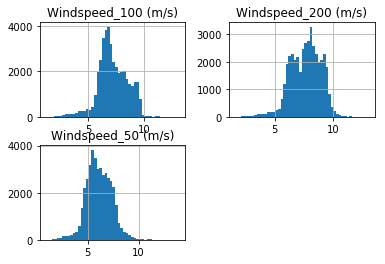

In [49]:
sub.hist(bins=50)

In [50]:
def preprocessing(df_input,mode,Transmission_line=False):
    #need to exclude data with transmission line and build models specifically for that
    import pandas as pd
    filtered_df = df_input[df_input['Distance to the closest Transmission line (kms)'].notnull()]
    df_new=pd.concat([df_input,filtered_df]).drop_duplicates(keep=False)
    if Transmission_line is True:
        df=filtered_df
    else:
        df=df_new
    #DTU or GWS nolonger useful use the new wind speeds collected 
    df['Lat']=df['Latitude(y)']
    df['Long']=df['Longitude(x)']
    df=df.drop(['GlobalWS80 (m/s)','DTU_50m_WindSp(m/s)','DTU_100m_WindSp(m/s)','DTU_200m_WindSp(m/s)','Altitude','Name','Longitude(x)','Latitude(y)','Distance between turbines (in decimal degrees)','Unnamed: 29','Unnamed: 30','meters','Kilometers','ID'],axis=1)
    df['50']=df['Windspeed_50 (m/s)']
    df['100']=df['Windspeed_100 (m/s)']
    df['200']=df['Windspeed_200 (m/s)']
    df=df.drop(['Windspeed_50 (m/s)','Windspeed_100 (m/s)','Windspeed_200 (m/s)'],axis=1)
    df=df.drop(['Wind power density_100m(W/m2 )'],axis=1)
    one_hot=pd.get_dummies(df['Country'])
    df=df.drop('Country',axis = 1)
    df=df.join(one_hot)
    if mode=='50':
        windspeed = df.pop('50').values
        features=df.drop(['100','200'],axis=1)
    elif mode=='100':
        windspeed = df.pop('100').values
        features=df.drop(['50','200'],axis=1)
    else:
        windspeed = df.pop('200').values
        features=df.drop(['50','100'],axis=1)
    return features,windspeed

In [51]:
x,y=preprocessing(trainval,'50')

In [52]:
#need to experiment if country and lat,long clash

In [53]:
x

,Distance to the closest Airport (kms),Distance to the closest Builtup (kms),Distance to the closest roads (kms),Distance to the closest Agricultural area (kms),Distance to the closest Barren area (kms),Distance to the closest Settlement (kms),Distance to the closest Shrubland (kms),Distance to the closest Vegetation (kms),Distance to the closest Water (kms),Distance to the closest Wetland (kms),Distance to the closest Forest (kms),Distance to the closest Grassland (kms),Distance to the closest Transmission line (kms),Distance to the closest Substation (kms),Elevation of Turbines (meters),Slope,Lat,Long,France,India,Italy,Japan,Portugal,Scotland,South Africa,Spain,Thailand,Turkey
0,316.757853,21.757443,4.252245,5.465398,22.108889,5.263048,419.679620,6.641265,15.911835,10.708700,5.388441,9.926330,NaN,3.459894,157.0,1.16256,48.487241,4.187531,1,0,0,0,0,0,0,0,0,0
1,316.957613,21.260777,4.079145,6.004260,22.499853,4.850949,419.287020,6.570363,15.653756,10.979020,5.972634,9.660460,NaN,4.021562,139.0,1.23730,48.484014,4.180844,1,0,0,0,0,0,0,0,0,0
2,317.375602,21.079416,4.579246,6.132073,22.051790,5.015085,418.994361,7.063328,16.147106,10.493069,6.010564,10.153662,NaN,3.751933,139.0,0.85422,48.481142,4.186048,1,0,0,0,0,0,0,0,0,0
4,317.575331,20.586777,4.489310,6.655014,22.449027,4.419523,418.605721,7.041736,15.917347,10.789563,6.125186,9.929589,NaN,4.335159,139.0,1.12599,48.477944,4.179483,1,0,0,0,0,0,0,0,0,0
5,317.636857,20.184593,4.329691,7.051231,22.969650,3.795386,418.328125,6.922738,15.563663,11.239705,6.135211,9.592249,NaN,4.961939,144.0,1.80995,48.475798,4.171646,1,0,0,0,0,0,0,0,0,0
6,317.672812,21.456906,5.406093,5.797802,21.032021,5.964951,419.079505,7.782603,17.057241,9.561925,5.498873,11.068514,NaN,2.789508,146.0,1.52312,48.481239,4.200262,1,0,0,0,0,0,0,0,0,0
7,317.679698,21.823596,5.795882,5.532693,20.529154,6.191148,419.285603,8.092183,17.475338,9.157601,5.139832,11.495981,NaN,2.220733,151.0,1.00833,48.482728,4.207841,1,0,0,0,0,0,0,0,0,0
8,317.202310,22.154969,5.417765,5.130053,20.831294,5.799273,419.709691,7.664501,17.104262,9.554935,4.798212,11.135545,NaN,2.210230,160.0,2.31903,48.486674,4.205209,1,0,0,0,0,0,0,0,0,0
9,317.634914,22.194076,6.130293,5.292378,20.116690,5.850711,419.516325,8.348053,17.816840,8.857528,4.815093,11.850587,NaN,1.711435,162.0,1.28004,48.484486,4.214326,1,0,0,0,0,0,0,0,0,0
10,317.690328,22.554662,6.618130,5.168332,19.582934,5.581968,419.686951,8.758472,17.874597,8.447605,4.579051,11.702049,NaN,1.173415,165.0,1.47123,48.485622,4.222317,1,0,0,0,0,0,0,0,0,0
